# Comparing performance of all classifier models (1-7)

We will compare validation performance on all fine-tuned classifiers.
Then we determine final test performance.


In [1]:
# setup 
import pprint
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# model names
v1_model_name = "BertGc_vanilla"
v2_model_name = "BertGc_fulltext"
v2_1_model_name = "BertGc_fulltext_weighted"
v3_model_name = "BertGc_tune_A"
v4_model_name = "BertGc_tune_B"
v5_model_name = "Gbert_tune_A"
v6_model_name = "Gbert_tune_B"
v7_model_name = "Gbert_fulltext"
v7_1_model_name = "Gbert_fulltext_weighted"

# load data
v1_val = pd.read_csv("../data/classification_results/classifier_bertGc_vanilla_validation_results.csv")
v1_test = pd.read_csv("../data/classification_results/classifier_bertGc_vanilla_test_results.csv")

v2_val = pd.read_csv("../data/classification_results/classifier_bertGc_fulltext_validation_results.csv")
v2_test = pd.read_csv("../data/classification_results/classifier_bertGc_fulltext_test_results.csv")

v2_1_val = pd.read_csv("../data/classification_results/classifier_bertGc_fulltext_weighted_validation_results.csv")
v2_1_test = pd.read_csv("../data/classification_results/classifier_bertGc_fulltext_weighted_test_results.csv")

v3_val = pd.read_csv("../data/classification_results/classifier_bertGc_tune_A_validation_results.csv")
v3_test = pd.read_csv("../data/classification_results/classifier_bertGc_tune_A_test_results.csv")

v4_val = pd.read_csv("../data/classification_results/classifier_bertGc_tune_B_validation_results.csv")
v4_test = pd.read_csv("../data/classification_results/classifier_bertGc_tune_B_test_results.csv")

v5_val = pd.read_csv("../data/classification_results/classifier_gbert_tune_A_validation_results.csv")
v5_test = pd.read_csv("../data/classification_results/classifier_gbert_tune_A_test_results.csv")

v6_val = pd.read_csv("../data/classification_results/classifier_gbert_tune_B_validation_results.csv")
v6_test = pd.read_csv("../data/classification_results/classifier_gbert_tune_B_test_results.csv")

v7_val = pd.read_csv("../data/classification_results/classifier_gbert_fulltext_validation_results.csv")
v7_test = pd.read_csv("../data/classification_results/classifier_gbert_fulltext_test_results.csv")

v7_1_val = pd.read_csv("../data/classification_results/classifier_gbert_fulltext_weighted_validation_results.csv")
v7_1_test = pd.read_csv("../data/classification_results/classifier_gbert_fulltext_weighted_test_results.csv")

In [2]:
# define function to display eval metrics
def get_metrics(true_labels, preds, model_name):
    metrics_summary = {}

    acc = accuracy_score(true_labels, preds)
    bal_acc = balanced_accuracy_score(true_labels, preds)

    precision = precision_score(true_labels, preds, average='macro', zero_division=0)
    recall = recall_score(true_labels, preds, average='macro', zero_division=0)
    f1 = f1_score(true_labels, preds, average='macro', zero_division=0)

    label_order = sorted(set(true_labels).union(set(preds)))
    report = classification_report(true_labels, preds, labels=label_order, zero_division=0)
    metrics_summary[model_name] = {
        'acc': acc,
        'bal_acc': bal_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    # print metrics
    print(f"Model: {model_name}")
    print(f"  Accuracy: {acc}")
    print(f"  Balanced Accuracy: {bal_acc}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}")
    print(f"  Classification Report:\n{report}")


    # Confusion Matrix
    label_order = sorted(set(true_labels).union(set(preds)))
    cm = confusion_matrix(true_labels, preds, labels=label_order)
    cm_df = pd.DataFrame(cm, index=label_order, columns=label_order)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


    return metrics_summary



____________________________________________________

Evaluation on Validation Set
_____________________________________________________


In [ ]:
# create df with all val data
models = [
    {"name": v1_model_name, "val": v1_val, "true_col": "true_label", "pred_col": "predicted_label"},
    {"name": v2_model_name, "val": v2_val, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v2_1_model_name, "val": v2_1_val, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v3_model_name, "val": v3_val, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v4_model_name, "val": v4_val, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v5_model_name, "val": v5_val, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v6_model_name, "val": v6_val, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v7_model_name, "val": v7_val, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v7_1_model_name, "val": v7_1_val, "true_col": "label", "pred_col": "prediction_label"},
]


Model: BertGc_vanilla
  Accuracy: 0.7168696936138796
  Balanced Accuracy: 0.7059283326370992
  Precision: 0.7217043702778092
  Recall: 0.7059283326370992
  F1-score: 0.7118754672284071
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.94      0.85      0.89       756
     CDU/CSU       0.72      0.81      0.76      1508
         FDP       0.63      0.58      0.60       683
       GRÜNE       0.66      0.55      0.60       771
       LINKE       0.72      0.77      0.75       541
         SPD       0.66      0.68      0.67      1159

    accuracy                           0.72      5418
   macro avg       0.72      0.71      0.71      5418
weighted avg       0.72      0.72      0.72      5418



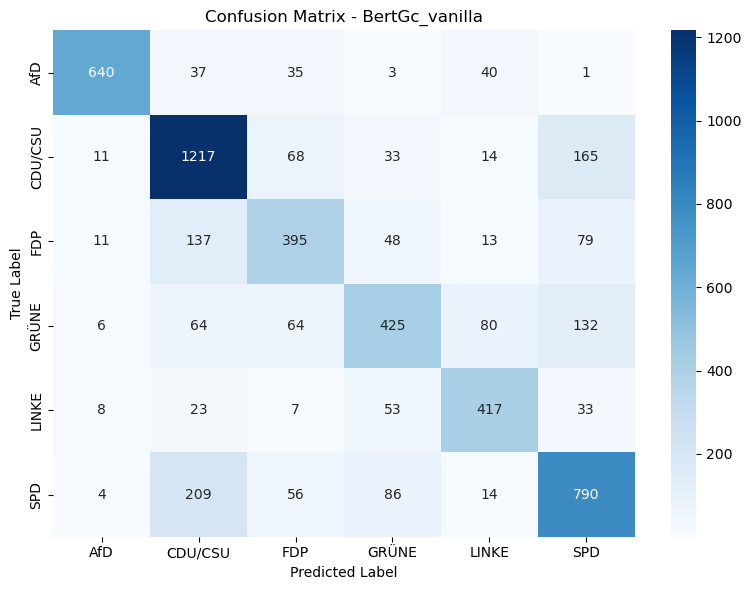

Model: BertGc_fulltext
  Accuracy: 0.804171280915467
  Balanced Accuracy: 0.7888836881077682
  Precision: 0.8154652639277679
  Recall: 0.7888836881077682
  F1-score: 0.7993156386294643
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.97      0.90      0.93       776
     CDU/CSU       0.81      0.85      0.83      1402
         FDP       0.78      0.67      0.72       713
       GRÜNE       0.76      0.63      0.69       712
       LINKE       0.85      0.82      0.83       581
         SPD       0.73      0.86      0.79      1234

    accuracy                           0.80      5418
   macro avg       0.82      0.79      0.80      5418
weighted avg       0.81      0.80      0.80      5418



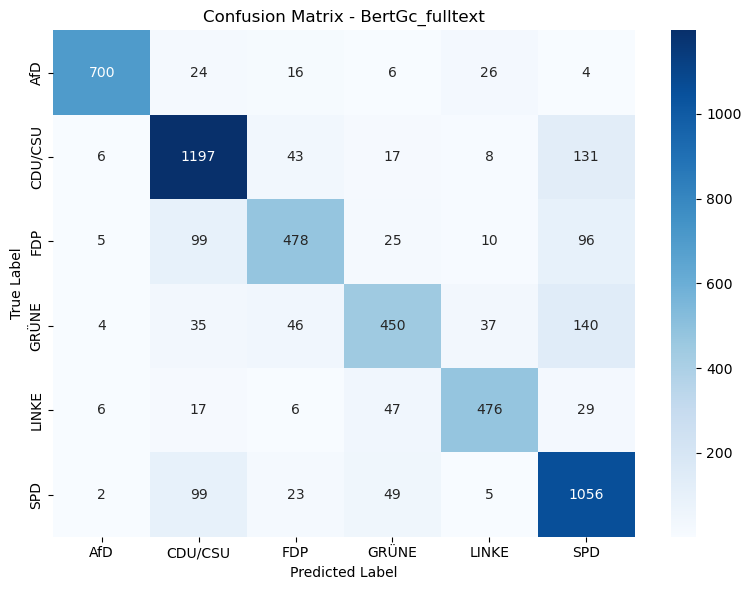

Model: BertGc_fulltext_weighted
  Accuracy: 0.8028792912513842
  Balanced Accuracy: 0.7990645777872086
  Precision: 0.8124175187796617
  Recall: 0.7990645777872086
  F1-score: 0.8020986659612824
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.95      0.93      0.94       776
     CDU/CSU       0.84      0.80      0.82      1402
         FDP       0.82      0.66      0.73       713
       GRÜNE       0.76      0.66      0.71       712
       LINKE       0.79      0.89      0.84       581
         SPD       0.71      0.85      0.77      1234

    accuracy                           0.80      5418
   macro avg       0.81      0.80      0.80      5418
weighted avg       0.81      0.80      0.80      5418



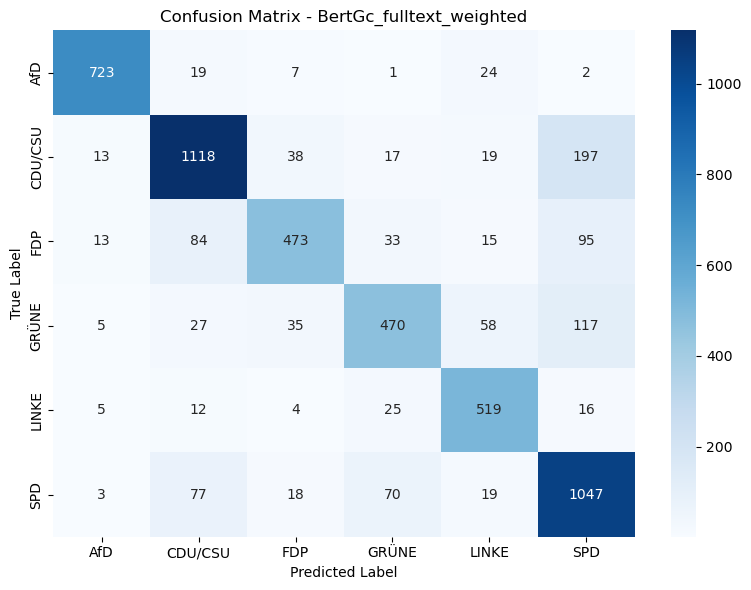

Model: BertGc_tune_A
  Accuracy: 0.7962347729789591
  Balanced Accuracy: 0.7800871577087086
  Precision: 0.8164112832761972
  Recall: 0.7800871577087086
  F1-score: 0.7916520625953445
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.94      0.93      0.94       776
     CDU/CSU       0.82      0.83      0.83      1402
         FDP       0.81      0.62      0.70       713
       GRÜNE       0.80      0.60      0.68       712
       LINKE       0.84      0.82      0.83       581
         SPD       0.68      0.88      0.76      1234

    accuracy                           0.80      5418
   macro avg       0.82      0.78      0.79      5418
weighted avg       0.80      0.80      0.79      5418



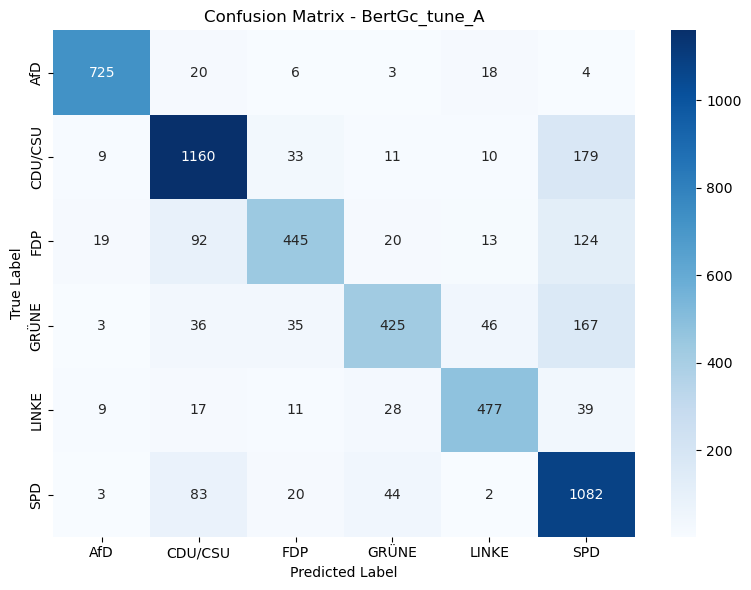

Model: BertGc_tune_B
  Accuracy: 0.6369509043927648
  Balanced Accuracy: 0.6322224982347332
  Precision: 0.6507697988104467
  Recall: 0.6322224982347332
  F1-score: 0.6317744160080815
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.93      0.72      0.81       776
     CDU/CSU       0.63      0.74      0.68      1402
         FDP       0.60      0.51      0.55       713
       GRÜNE       0.61      0.46      0.52       712
       LINKE       0.53      0.80      0.64       581
         SPD       0.61      0.57      0.59      1234

    accuracy                           0.64      5418
   macro avg       0.65      0.63      0.63      5418
weighted avg       0.65      0.64      0.64      5418



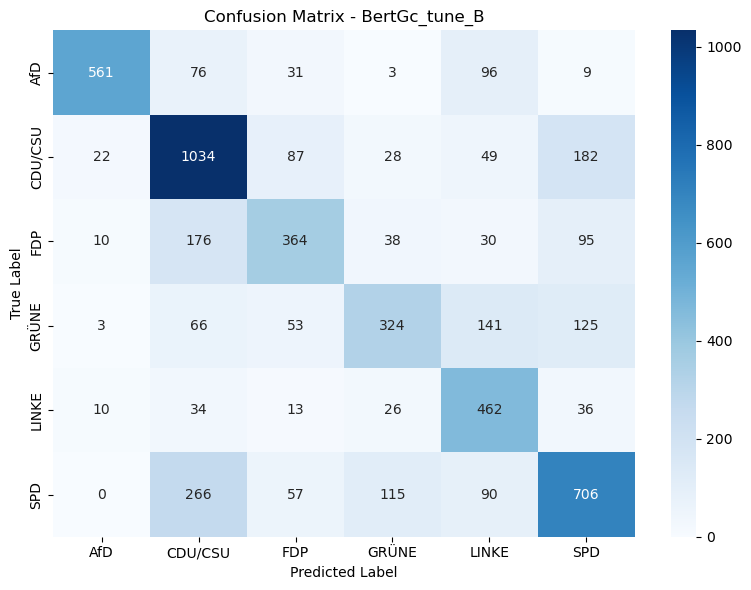

Model: Gbert_tune_A
  Accuracy: 0.7731635289774824
  Balanced Accuracy: 0.7596529371025423
  Precision: 0.7890567245923849
  Recall: 0.7596529371025423
  F1-score: 0.770649612168823
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.95      0.90      0.92       776
     CDU/CSU       0.72      0.90      0.80      1402
         FDP       0.72      0.65      0.68       713
       GRÜNE       0.74      0.60      0.66       712
       LINKE       0.85      0.80      0.83       581
         SPD       0.76      0.71      0.73      1234

    accuracy                           0.77      5418
   macro avg       0.79      0.76      0.77      5418
weighted avg       0.78      0.77      0.77      5418



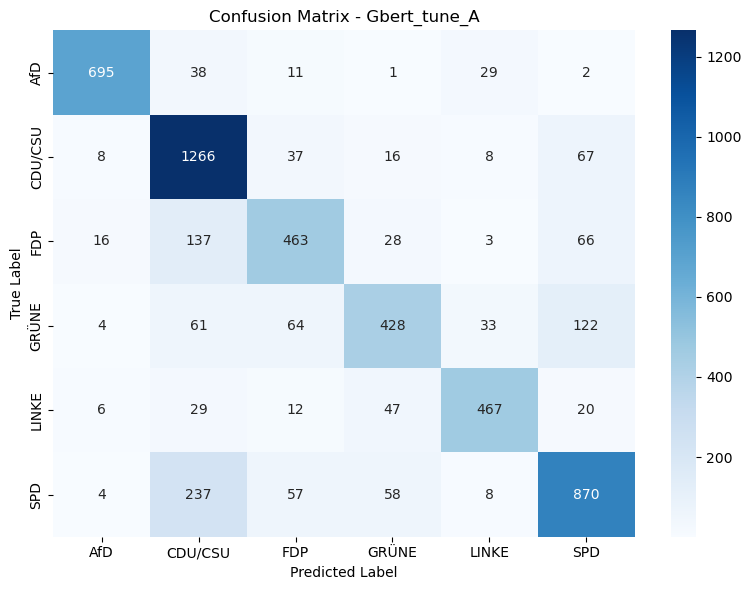

Model: Gbert_tune_B
  Accuracy: 0.6356589147286822
  Balanced Accuracy: 0.6530388904893446
  Precision: 0.6343739184509186
  Recall: 0.6530388904893446
  F1-score: 0.6395403215427818
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.86      0.83      0.84       776
     CDU/CSU       0.70      0.60      0.65      1402
         FDP       0.51      0.58      0.54       713
       GRÜNE       0.49      0.59      0.53       712
       LINKE       0.60      0.76      0.68       581
         SPD       0.64      0.56      0.60      1234

    accuracy                           0.64      5418
   macro avg       0.63      0.65      0.64      5418
weighted avg       0.65      0.64      0.64      5418



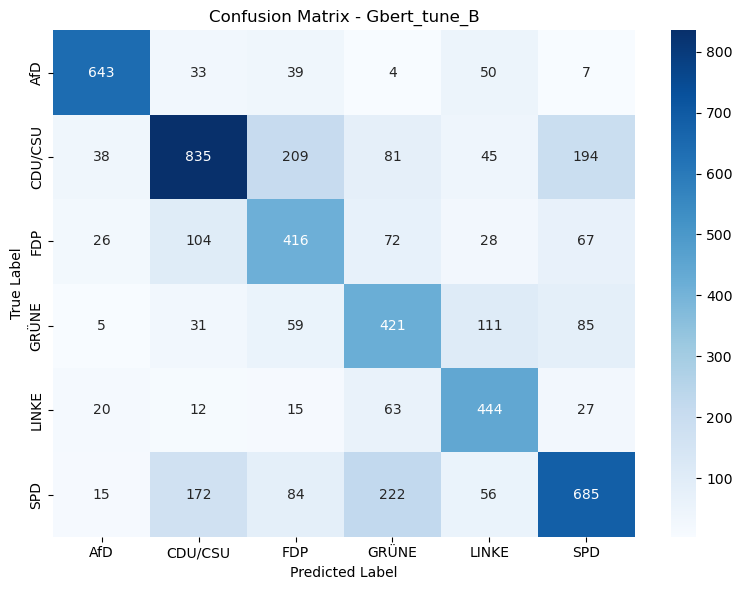

Model: Gbert_fulltext
  Accuracy: 0.8086009597637505
  Balanced Accuracy: 0.8003102969763444
  Precision: 0.817919432214279
  Recall: 0.8003102969763444
  F1-score: 0.8081172667443931
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.96      0.89      0.92       776
     CDU/CSU       0.81      0.85      0.83      1402
         FDP       0.78      0.70      0.74       713
       GRÜNE       0.72      0.72      0.72       712
       LINKE       0.88      0.83      0.86       581
         SPD       0.76      0.82      0.79      1234

    accuracy                           0.81      5418
   macro avg       0.82      0.80      0.81      5418
weighted avg       0.81      0.81      0.81      5418



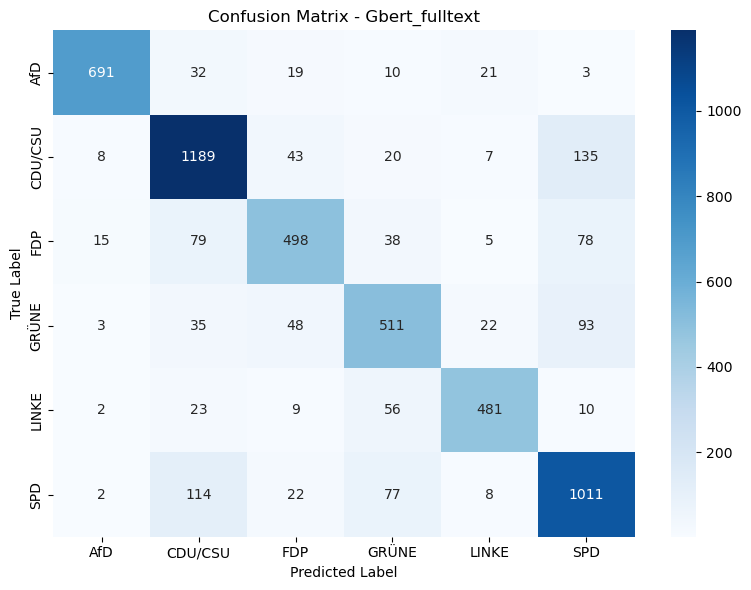

Model: Gbert_fulltext_weighted
  Accuracy: 0.8146917681801402
  Balanced Accuracy: 0.8073149492001975
  Precision: 0.8223377224533932
  Recall: 0.8073149492001975
  F1-score: 0.814119466421308
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.96      0.91      0.94       776
     CDU/CSU       0.81      0.88      0.84      1402
         FDP       0.75      0.74      0.75       713
       GRÜNE       0.73      0.73      0.73       712
       LINKE       0.90      0.81      0.85       581
         SPD       0.78      0.78      0.78      1234

    accuracy                           0.81      5418
   macro avg       0.82      0.81      0.81      5418
weighted avg       0.82      0.81      0.81      5418



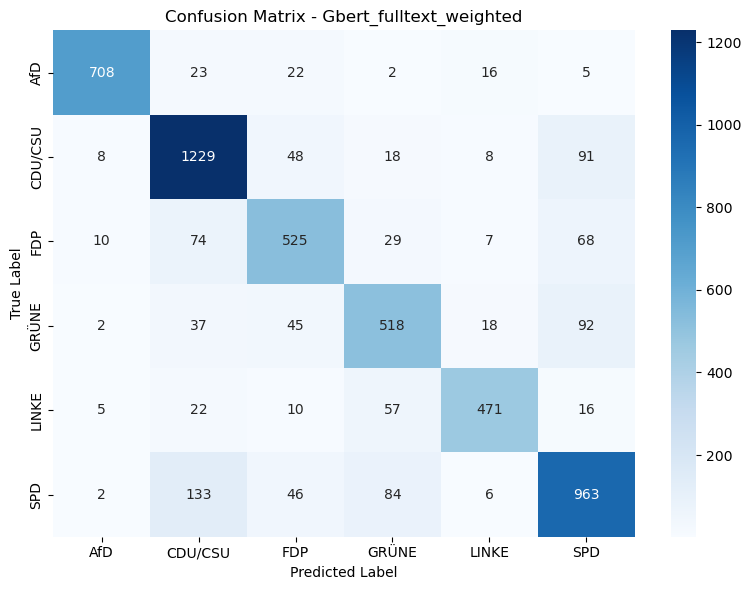

In [4]:
# evaluate
# On validation set
all_results = {}

for model in models:
    result = get_metrics(model["val"][model["true_col"]], model["val"][model["pred_col"]], model["name"])
    all_results[model["name"]] = result[model["name"]]

# save in pd df
val_df = pd.DataFrame(all_results).T  # Transposed so that every model a row

____________________________________________________

Evaluation on test Set
_____________________________________________________


Model: BertGc_vanilla
  Accuracy: 0.7120708748615725
  Balanced Accuracy: 0.7065095110316534
  Precision: 0.7192983025612326
  Recall: 0.7065095110316534
  F1-score: 0.7099151264264133
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.95      0.86      0.90       744
     CDU/CSU       0.71      0.81      0.76      1428
         FDP       0.63      0.59      0.61       706
       GRÜNE       0.66      0.51      0.58       799
       LINKE       0.71      0.80      0.75       534
         SPD       0.65      0.67      0.66      1207

    accuracy                           0.71      5418
   macro avg       0.72      0.71      0.71      5418
weighted avg       0.71      0.71      0.71      5418



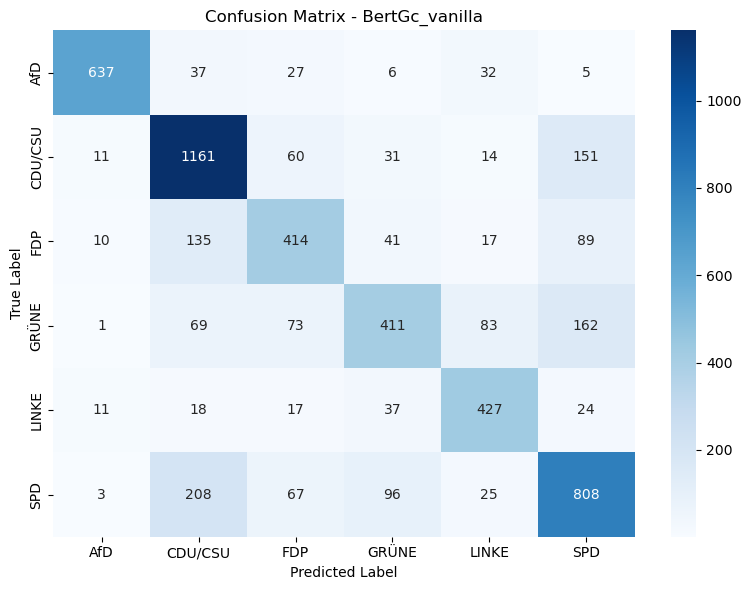

Model: BertGc_fulltext
  Accuracy: 0.7954964931709118
  Balanced Accuracy: 0.7843296111053965
  Precision: 0.8084749187045892
  Recall: 0.7843296111053965
  F1-score: 0.7926336182480193
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.94      0.90      0.92       747
     CDU/CSU       0.83      0.85      0.84      1426
         FDP       0.78      0.69      0.73       678
       GRÜNE       0.79      0.61      0.69       804
       LINKE       0.83      0.81      0.82       593
         SPD       0.69      0.84      0.76      1170

    accuracy                           0.80      5418
   macro avg       0.81      0.78      0.79      5418
weighted avg       0.80      0.80      0.79      5418



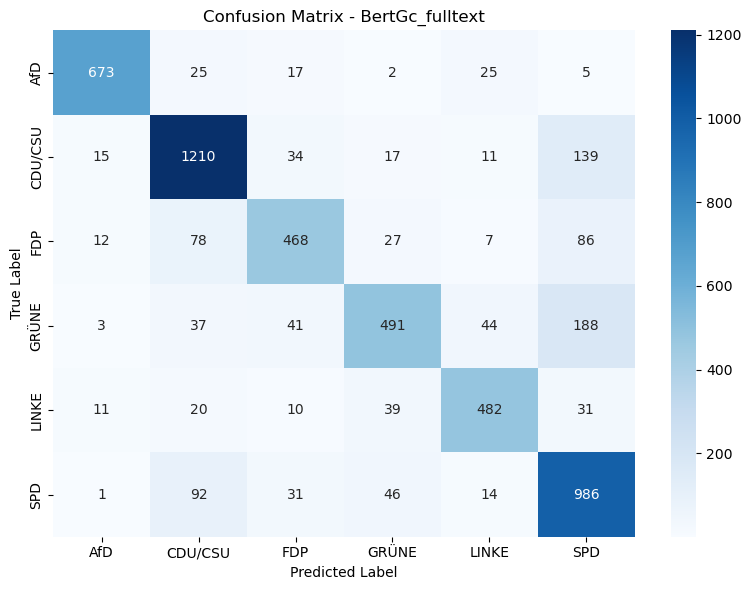

Model: BertGc_fulltext_weighted
  Accuracy: 0.7925433739387228
  Balanced Accuracy: 0.7926570696080817
  Precision: 0.8045797766136488
  Recall: 0.7926570696080817
  F1-score: 0.7940277350542844
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.93      0.93      0.93       747
     CDU/CSU       0.86      0.79      0.82      1426
         FDP       0.80      0.67      0.73       678
       GRÜNE       0.79      0.64      0.71       804
       LINKE       0.79      0.89      0.83       593
         SPD       0.67      0.84      0.74      1170

    accuracy                           0.79      5418
   macro avg       0.80      0.79      0.79      5418
weighted avg       0.80      0.79      0.79      5418



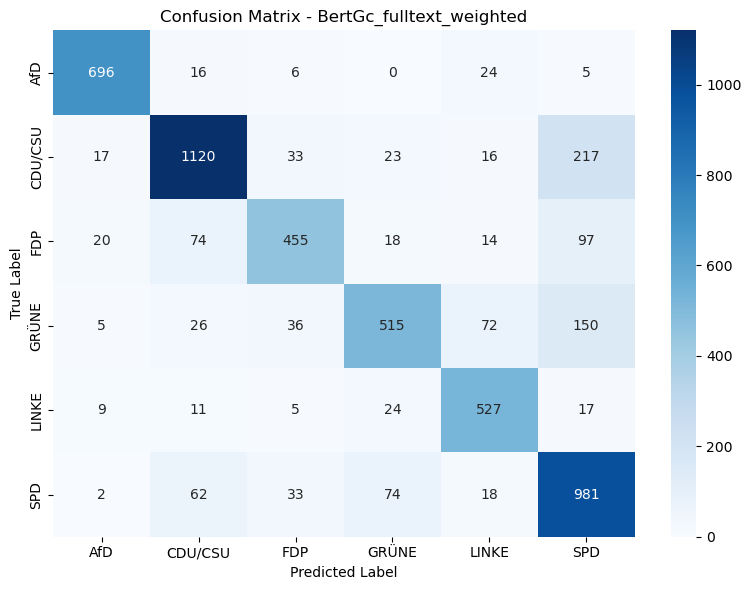

Model: BertGc_tune_A
  Accuracy: 0.778516057585825
  Balanced Accuracy: 0.7669352651556297
  Precision: 0.8036438265620661
  Recall: 0.7669352651556297
  F1-score: 0.7755717714702405
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.92      0.93      0.93       747
     CDU/CSU       0.83      0.81      0.82      1426
         FDP       0.78      0.65      0.71       678
       GRÜNE       0.83      0.53      0.65       804
       LINKE       0.82      0.81      0.82       593
         SPD       0.63      0.88      0.74      1170

    accuracy                           0.78      5418
   macro avg       0.80      0.77      0.78      5418
weighted avg       0.79      0.78      0.78      5418



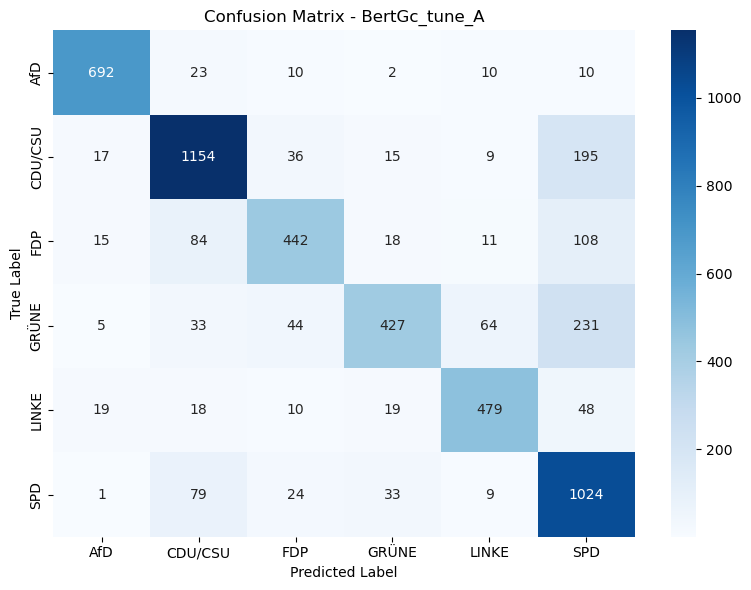

Model: BertGc_tune_B
  Accuracy: 0.6341823551125877
  Balanced Accuracy: 0.6322014876634449
  Precision: 0.650293057916714
  Recall: 0.6322014876634449
  F1-score: 0.6305012612735441
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.91      0.72      0.80       747
     CDU/CSU       0.63      0.73      0.68      1426
         FDP       0.61      0.51      0.56       678
       GRÜNE       0.62      0.44      0.52       804
       LINKE       0.53      0.82      0.65       593
         SPD       0.60      0.57      0.59      1170

    accuracy                           0.63      5418
   macro avg       0.65      0.63      0.63      5418
weighted avg       0.65      0.63      0.63      5418



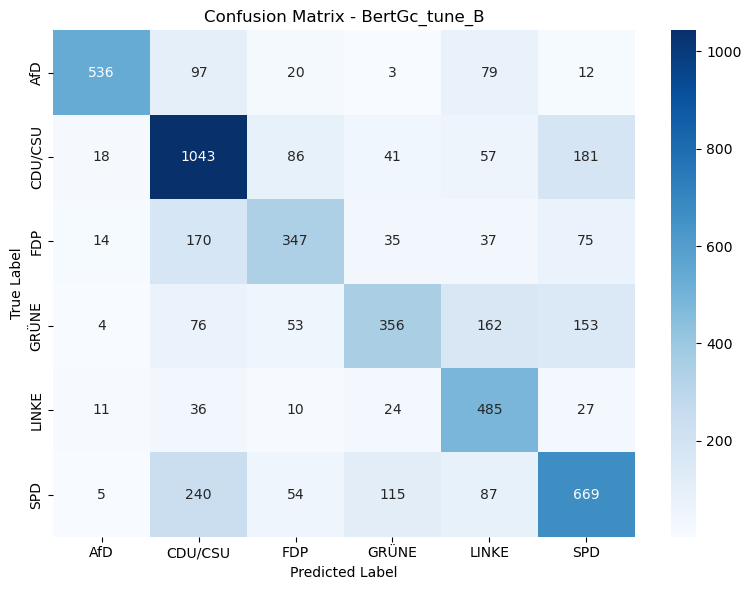

Model: Gbert_tune_A
  Accuracy: 0.7652270210409745
  Balanced Accuracy: 0.7555326707236062
  Precision: 0.7787912471050816
  Recall: 0.7555326707236062
  F1-score: 0.7630228011683289
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.92      0.92      0.92       747
     CDU/CSU       0.73      0.89      0.80      1426
         FDP       0.69      0.67      0.68       678
       GRÜNE       0.75      0.54      0.63       804
       LINKE       0.86      0.81      0.83       593
         SPD       0.71      0.70      0.71      1170

    accuracy                           0.77      5418
   macro avg       0.78      0.76      0.76      5418
weighted avg       0.77      0.77      0.76      5418



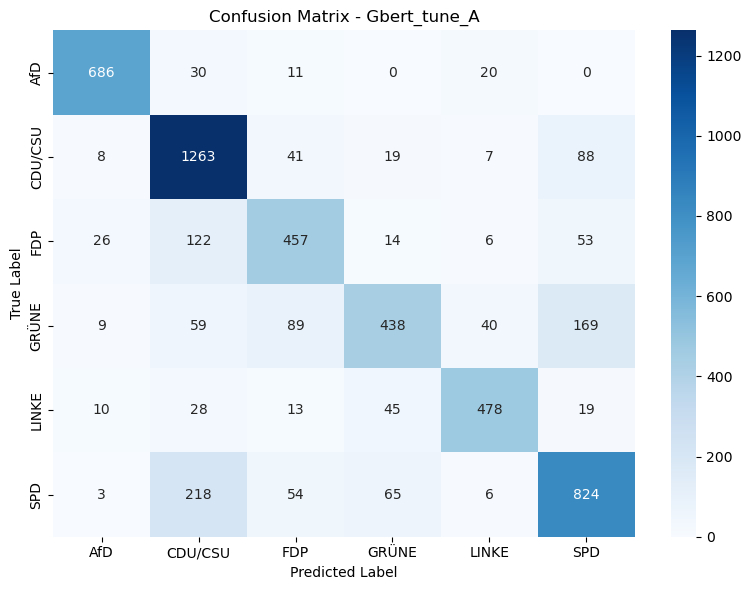

Model: Gbert_tune_B
  Accuracy: 0.6238464377999262
  Balanced Accuracy: 0.6438428153122482
  Precision: 0.6244386623208871
  Recall: 0.6438428153122482
  F1-score: 0.6294255506816466
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.83      0.80      0.82       747
     CDU/CSU       0.72      0.58      0.64      1426
         FDP       0.49      0.60      0.54       678
       GRÜNE       0.52      0.58      0.55       804
       LINKE       0.58      0.77      0.66       593
         SPD       0.60      0.54      0.57      1170

    accuracy                           0.62      5418
   macro avg       0.62      0.64      0.63      5418
weighted avg       0.64      0.62      0.63      5418



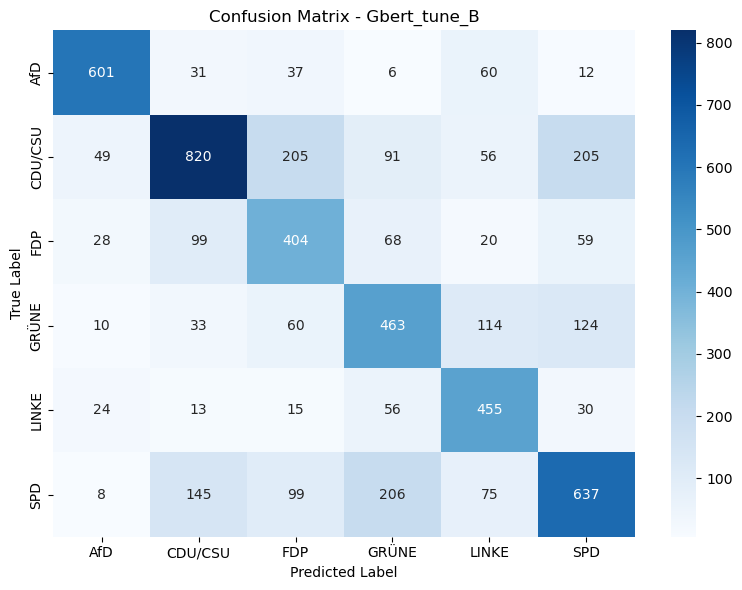

Model: Gbert_fulltext
  Accuracy: 0.7927279438907346
  Balanced Accuracy: 0.7871052362424966
  Precision: 0.8015311247753113
  Recall: 0.7871052362424966
  F1-score: 0.7933127738393543
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.95      0.90      0.92       747
     CDU/CSU       0.82      0.83      0.83      1426
         FDP       0.75      0.71      0.73       678
       GRÜNE       0.74      0.68      0.71       804
       LINKE       0.85      0.81      0.83       593
         SPD       0.71      0.80      0.75      1170

    accuracy                           0.79      5418
   macro avg       0.80      0.79      0.79      5418
weighted avg       0.80      0.79      0.79      5418



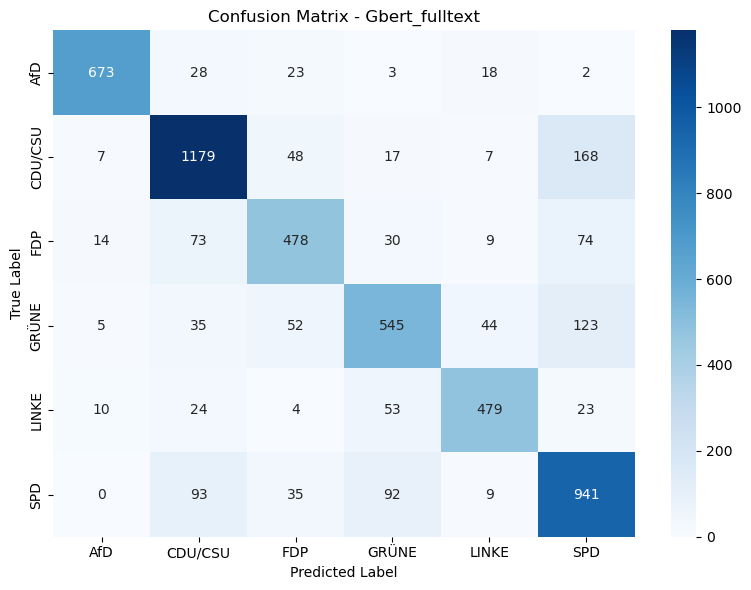

Model: Gbert_fulltext_weighted
  Accuracy: 0.8078626799557033
  Balanced Accuracy: 0.8022927359529778
  Precision: 0.8159714076235015
  Recall: 0.8022927359529778
  F1-score: 0.808204835709519
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.95      0.90      0.93       747
     CDU/CSU       0.82      0.86      0.84      1426
         FDP       0.71      0.76      0.74       678
       GRÜNE       0.76      0.71      0.73       804
       LINKE       0.89      0.80      0.84       593
         SPD       0.75      0.78      0.77      1170

    accuracy                           0.81      5418
   macro avg       0.82      0.80      0.81      5418
weighted avg       0.81      0.81      0.81      5418



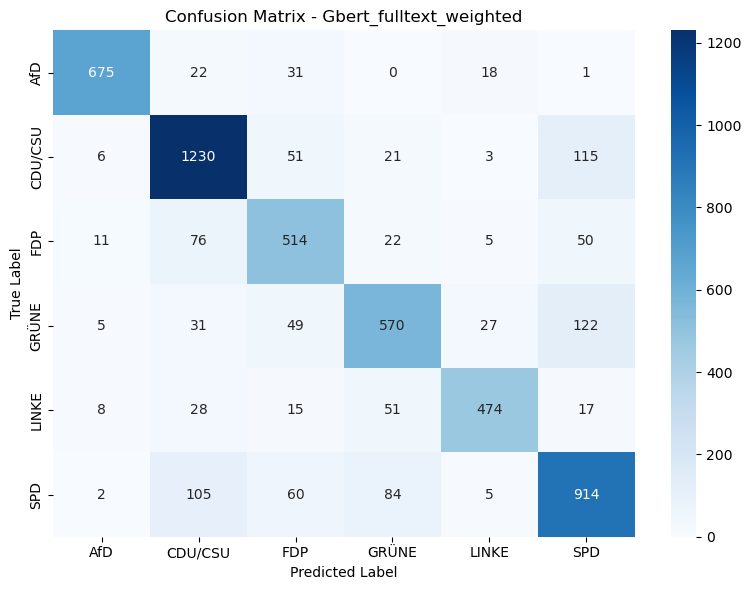

In [ ]:
# create df with all test data
models = [
    {"name": v1_model_name, "test": v1_test, "true_col": "true_label", "pred_col": "predicted_label"},
    {"name": v2_model_name, "test": v2_test, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v2_1_model_name, "test": v2_1_test, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v3_model_name, "test": v3_test, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v4_model_name, "test": v4_test, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v5_model_name, "test": v5_test, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v6_model_name, "test": v6_test, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v7_model_name, "test": v7_test, "true_col": "label", "pred_col": "prediction_label"},
    {"name": v7_1_model_name, "test": v7_1_test, "true_col": "label", "pred_col": "prediction_label"},
]

# eval on test data
all_test_results = {}

for model in models:
    result = get_metrics(model["test"][model["true_col"]], model["test"][model["pred_col"]], model["name"])
    all_test_results[model["name"]] = result[model["name"]]

# create df
test_df = pd.DataFrame(all_test_results).T


____________________________________________________

### Final Comparison table
_____________________________________________________


In [6]:
val_df

,acc,bal_acc,precision,recall,f1
BertGc_vanilla,0.716870,0.705928,0.721704,0.705928,0.711875
BertGc_fulltext,0.804171,0.788884,0.815465,0.788884,0.799316
BertGc_fulltext_weighted,0.802879,0.799065,0.812418,0.799065,0.802099
BertGc_tune_A,0.796235,0.780087,0.816411,0.780087,0.791652
BertGc_tune_B,0.636951,0.632222,0.650770,0.632222,0.631774
Gbert_tune_A,0.773164,0.759653,0.789057,0.759653,0.770650
Gbert_tune_B,0.635659,0.653039,0.634374,0.653039,0.639540
Gbert_fulltext,0.808601,0.800310,0.817919,0.800310,0.808117
Gbert_fulltext_weighted,0.814692,0.807315,0.822338,0.807315,0.814119


In [7]:
test_df

,acc,bal_acc,precision,recall,f1
BertGc_vanilla,0.712071,0.706510,0.719298,0.706510,0.709915
BertGc_fulltext,0.795496,0.784330,0.808475,0.784330,0.792634
BertGc_fulltext_weighted,0.792543,0.792657,0.804580,0.792657,0.794028
BertGc_tune_A,0.778516,0.766935,0.803644,0.766935,0.775572
BertGc_tune_B,0.634182,0.632201,0.650293,0.632201,0.630501
Gbert_tune_A,0.765227,0.755533,0.778791,0.755533,0.763023
Gbert_tune_B,0.623846,0.643843,0.624439,0.643843,0.629426
Gbert_fulltext,0.792728,0.787105,0.801531,0.787105,0.793313
Gbert_fulltext_weighted,0.807863,0.802293,0.815971,0.802293,0.808205


____________________________________________________

Look at final hyperparameter of tuned models for report
_____________________________________________________


In [8]:
hyperpara_v3 = pd.read_csv("../data/classification_results/classifier_bertGc_tune_A_hyperparameter.csv")
pprint.pprint(hyperpara_v3['0'].iloc[2])

("{'learning_rate': 2e-05, 'per_device_train_batch_size': 16, "
 "'num_train_epochs': 4, 'weight_decay': 0.01}")


In [9]:
hyperpara_v4 = pd.read_csv("../data/classification_results/classifier_bertGc_tune_B_hyperparameter.csv")
pprint.pprint(hyperpara_v4['0'].iloc[2])

("{'learning_rate': 2e-05, 'per_device_train_batch_size': 8, "
 "'num_train_epochs': 3, 'weight_decay': 0.05}")


In [10]:
hyperpara_v5 = pd.read_csv("../data/classification_results/classifier_gbert_tune_A_hyperparameter.csv")
pprint.pprint(hyperpara_v3['0'].iloc[2])

("{'learning_rate': 2e-05, 'per_device_train_batch_size': 16, "
 "'num_train_epochs': 4, 'weight_decay': 0.01}")


In [11]:
hyperpara_v6 = pd.read_csv("../data/classification_results/classifier_gbert_tune_B_hyperparameter.csv")
pprint.pprint(hyperpara_v3['0'].iloc[2])

("{'learning_rate': 2e-05, 'per_device_train_batch_size': 16, "
 "'num_train_epochs': 4, 'weight_decay': 0.01}")
